# Credit Card Fraud Detection (Intermediate Level)
This project aims to detect fraudulent credit card transactions using advanced machine learning techniques. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 


# Load and Explore the Dataset 

In [2]:
df = pd.read_csv("G:/Power BI/datasets/creditcard_fraud_processed.csv")

# Display basic info 
print(df.info()) 

# Show first few rows 
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Amount  8000 non-null   float64
 1   V1      8000 non-null   float64
 2   V2      8000 non-null   float64
 3   Class   8000 non-null   float64
dtypes: float64(4)
memory usage: 250.1 KB
None


,Amount,V1,V2,Class
0,0.973493,-0.369717,0.576251,0.0
1,0.901135,-0.753189,0.440919,0.0
2,-0.497338,0.971344,0.336357,0.0
3,0.752507,0.207930,-1.022456,0.0
4,0.711887,-0.848067,0.394256,0.0


# Data Preprocessing 
Check for missing values,
Standardize numerical features,
Handle class imbalance using SMOTE 


In [3]:
# Check for null values 
print(df.isnull().sum()) 

# Standardize 'Amount' column 
scaler = StandardScaler() 
df["Amount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1)) 

# Drop 'Time' column as it is not useful 
df = df.drop(columns=['Time']) 

Amount    0
V1        0
V2        0
Class     0
dtype: int64


KeyError: "['Time'] not found in axis"

# Train-Test Split 

In [4]:
X = df.drop(columns=["Class"])  # Features 
y = df["Class"]  # Target variable 
# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, 
stratify=y)

# Handle Class Imbalance using SMOTE 

In [5]:
smote = SMOTE(sampling_strategy=0.5, random_state=42) 
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train) 
# Check class distribution after SMOTE 
print(y_train_sm.value_counts())

Class
0.0    6272
1.0    3136
Name: count, dtype: int64


#  Train an Advanced Classification Model (Random Forest) 

In [6]:
# Train a Random Forest model 
model = RandomForestClassifier(n_estimators=100, random_state=42) 
model.fit(X_train_sm, y_train_sm) 

# Predictions 
y_pred = model.predict(X_test) 

# Model Evaluation 
print("Accuracy Score:", accuracy_score(y_test, y_pred)) 
print("Classification Report:\n", classification_report(y_test, y_pred)) 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred)) 


Accuracy Score: 0.9075
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      1568
         1.0       0.01      0.03      0.01        32

    accuracy                           0.91      1600
   macro avg       0.49      0.48      0.48      1600
weighted avg       0.96      0.91      0.93      1600

Confusion Matrix:
 [[1451  117]
 [  31    1]]


# Visualizing Results 

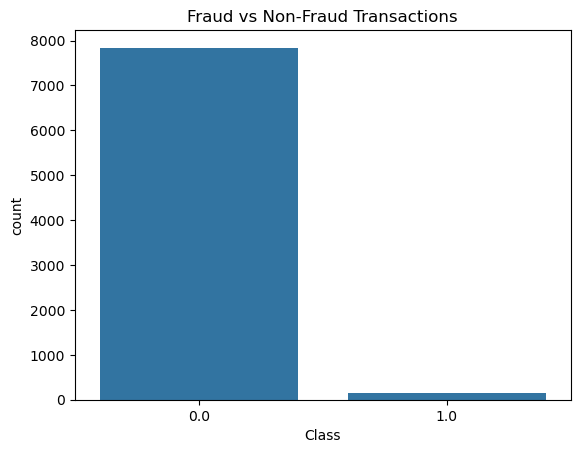

In [7]:
# Plot fraud vs non-fraud transactions 
sns.countplot(x=df["Class"]) 
plt.title("Fraud vs Non-Fraud Transactions") 
plt.show()